# Lesson 1: DIY

In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# This file contains all the main external libs we'll use
from fastai.imports import *

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

Using images of boats, classified into 9 classes. Taken from https://www.kaggle.com/clorichel/boat-types-recognition. Images should be downloaded to data/: https://www.kaggle.com/clorichel/boat-types-recognition/downloads/boat-types-recognition.zip/2

Set path to data

In [5]:
PATH = "../../../data/boats/"

In [6]:
os.listdir(PATH)

['kayak',
 'sailboat',
 'ferry boat',
 'paper boat',
 'valid',
 'models',
 'inflatable boat',
 'freight boat',
 'train',
 'tmp',
 'gondola',
 'cruise ship',
 'buoy']

In [7]:
files = os.listdir(f'{PATH}kayak')[:5]
files

[]

In [9]:
img = plt.imread(f'{PATH}/kayak/{files[0]}')
plt.imshow(img);

IndexError: list index out of range

In [10]:
img.shape

NameError: name 'img' is not defined

Manipulate data to generate training and validation sets.

In [6]:
labels = {d: len(os.listdir(f'{PATH}{d}')) for d in os.listdir(f'{PATH}')}
labels

{'kayak': 0,
 'sailboat': 0,
 'ferry boat': 0,
 'paper boat': 0,
 'valid': 9,
 'models': 1,
 'inflatable boat': 0,
 'freight boat': 0,
 'train': 9,
 'tmp': 3,
 'gondola': 0,
 'cruise ship': 0,
 'buoy': 0}

In [ ]:
num_images = sum(labels.values())
num_images

In [ ]:
val_idxs = get_cv_idxs(num_images)
len(val_idxs)

In [ ]:
os.mkdir(f'{PATH}train')
os.mkdir(f'{PATH}valid')

In [ ]:
idx = 0
for label in labels:
    os.mkdir(f'{PATH}valid/{label}')
    os.mkdir(f'{PATH}train/{label}')
    images = os.listdir(f'{PATH}{label}')
    for image in images:
        if idx in val_idxs:
            os.rename(f'{PATH}{label}/{image}', f'{PATH}valid/{label}/{image}')
        else:
            os.rename(f'{PATH}{label}/{image}', f'{PATH}train/{label}/{image}')
        idx += 1

In [7]:
arch=resnet34
#arch = resnext101_64
sz=224
#bs = 58
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

epoch      trn_loss   val_loss   accuracy                
    0      1.437022   0.58011    0.819113  
    1      0.90831    0.383699   0.887372                



[array([0.3837]), 0.8873720101935871]

In [14]:
data

In [15]:
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8])

In [16]:
data.classes

['buoy',
 'cruise ship',
 'ferry boat',
 'freight boat',
 'gondola',
 'inflatable boat',
 'kayak',
 'paper boat',
 'sailboat']

In [8]:
log_preds = learn.predict()
log_preds.shape

(293, 9)

Predictions are an array of arrays. One outer item per image, one inner item per class, holding the log of the prediction.

In [9]:
log_preds

array([[-3.86631, -5.89209, -5.04293, ..., -5.69577, -5.32714, -0.0528 ],
       [-1.40704, -3.04161, -3.2229 , ..., -3.19724, -2.15428, -2.22684],
       [-0.17102, -5.31103, -5.64506, ..., -2.42915, -3.86611, -4.02058],
       ...,
       [-8.60862, -9.39445, -8.51737, ..., -9.75282, -7.18795, -0.00185],
       [-5.45175, -6.66683, -4.94665, ..., -7.91065, -5.98024, -0.0263 ],
       [-7.59167, -7.81517, -6.36105, ..., -9.35853, -6.45197, -0.00761]], dtype=float32)

Argmax finds the index of the highest value (prediction) in an array -> the predicted class.

In [10]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to class index
preds

array([8, 4, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 8, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 6, 1, 8, 1, 2, 2, 2, 2, 2, 2, 8, 2, 2,
       2, 1, 1, 1, 2, 1, 1, 2, 8, 2, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 8, 6, 0,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 8, 6, 6, 6, 6, 4, 8, 7, 6, 7, 7, 6, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 8, 6, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8])

Convert log probabilities using .exp. [:,$i] takes the ith value of each array, i.e. predictions for class with index i.

In [11]:
def get_probs(cls_idx):
    return np.exp(log_preds[:,cls_idx])

In [12]:
l = data.classes.index('buoy')
probs = get_probs(l)
probs

array([0.02094, 0.24487, 0.84281, 0.14372, 0.9415 , 0.61784, 0.90974, 0.97331, 0.67327, 0.51251, 0.51396,
       0.81303, 0.88064, 0.90823, 0.001  , 0.00302, 0.00003, 0.00188, 0.0002 , 0.00012, 0.00229, 0.0133 ,
       0.0001 , 0.02761, 0.0001 , 0.00001, 0.4548 , 0.0015 , 0.00327, 0.00008, 0.00223, 0.00005, 0.01639,
       0.0013 , 0.0024 , 0.00077, 0.00016, 0.00002, 0.00016, 0.00109, 0.0136 , 0.00007, 0.00122, 0.00026,
       0.01534, 0.00125, 0.00267, 0.02171, 0.08866, 0.04699, 0.00002, 0.01196, 0.00066, 0.00005, 0.00002,
       0.02097, 0.00628, 0.02322, 0.0014 , 0.139  , 0.03585, 0.03473, 0.00657, 0.00374, 0.00393, 0.15497,
       0.00791, 0.00312, 0.02309, 0.00169, 0.00187, 0.00085, 0.02747, 0.12455, 0.00597, 0.00949, 0.01321,
       0.04047, 0.01117, 0.00003, 0.01726, 0.00201, 0.04154, 0.00047, 0.     , 0.00005, 0.001  , 0.00144,
       0.00006, 0.00059, 0.00202, 0.00023, 0.02216, 0.00014, 0.00017, 0.00967, 0.     , 0.00877, 0.00025,
       0.00017, 0.00064, 0.00009, 0.00088, 0.0

In [13]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [14]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [21]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [f'{data.classes[preds[x]]}\n{get_probs(data.val_y[x])[x]}' for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')

Correctly classified


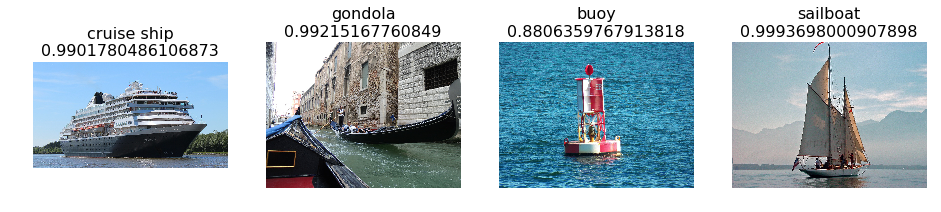

In [22]:
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


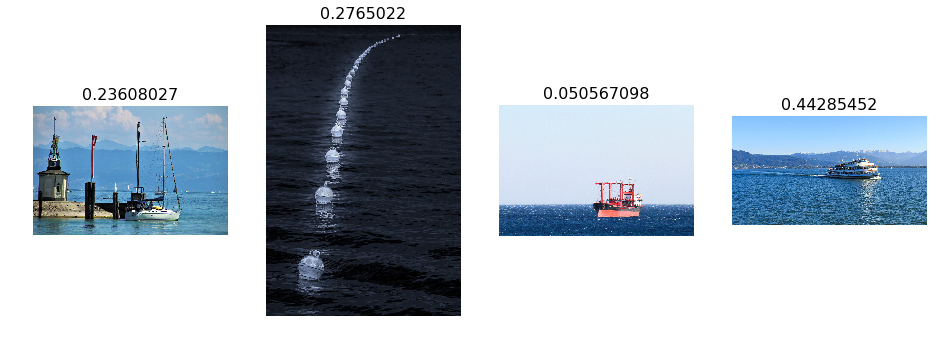

In [26]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [27]:
def most_by_mask(y, mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * get_probs(y)[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    # Mask: predicted [in]correctly, and class y.
    return most_by_mask(y, ((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

In [ ]:
# Correct buoys:
kayak_idx = data.classes.index('kayak')
correct_kayaks = np.where((preds == data.val_y) & (data.val_y == kayak_idx))[0]
correct_kayaks

In [ ]:
correct_kayaks[np.argsort(get_probs(kayak_idx)[correct_kayaks])[:4]]

In [ ]:
for idx, cls in enumerate(data.classes):
    plot_val_with_title(most_by_correct(idx, True), f"Most correct {cls}")

In [ ]:
for idx, cls in enumerate(data.classes):
    plot_val_with_title(most_by_correct(idx, False), f"Most incorrect {cls}")

# Learning Rate

# Following the guide
1. precompute=True
1. Use `lr_find()` to find highest learning rate where loss is still clearly improving
1. Train last layer from precomputed activations for 1-2 epochs
1. Train last layer with data augmentation (i.e. precompute=False) for 2-3 epochs with cycle_len=1
1. Unfreeze all layers
1. Set earlier layers to 3x-10x lower learning rate than next higher layer
1. Use `lr_find()` again
1. Train full network with cycle_mult=2 until over-fitting

## 1. Precompute=True

In [138]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

## 2. Find LR

In [139]:
learn.lr_find(start_lr=1e-3, end_lr=1e-1)

epoch      trn_loss   val_loss   accuracy                
    0      1.717631   0.624539   0.832765  


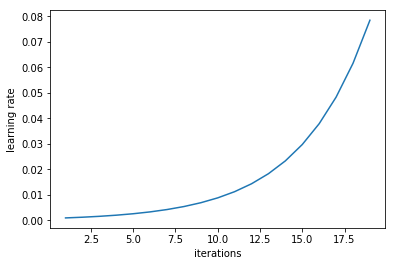

In [140]:
learn.sched.plot_lr()

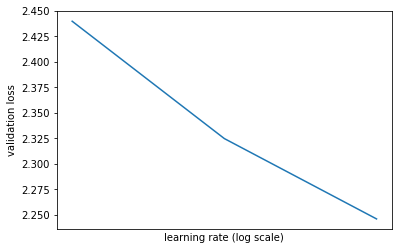

In [141]:
learn.sched.plot()

In [142]:
learning_rate = 0.02

## 3. Train last layer

In [143]:
learn.fit(learning_rate, 2)

epoch      trn_loss   val_loss   accuracy                
    0      1.298657   0.485461   0.860068  
    1      0.829723   0.34918    0.894198                


[array([0.34918]), 0.8941979542527182]

## 4. Train last layer with data augmentation

In [144]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [145]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [146]:
ims = np.stack([get_augs() for i in range(6)])

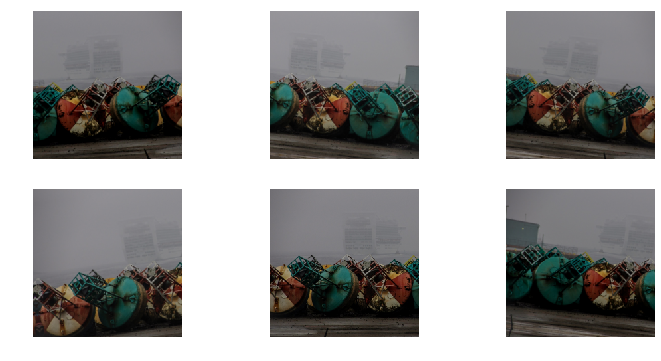

In [147]:
plots(ims, rows=2)

In [148]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [149]:
learn.fit(learning_rate, 1)

epoch      trn_loss   val_loss   accuracy                
    0      1.289281   0.571186   0.832765  


[array([0.57119]), 0.8327645057297404]

In [150]:
learn.precompute=False

In [151]:
learn.fit(learning_rate, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.598701   0.421848   0.883959  
    1      0.568347   0.379871   0.901024                  
    2      0.513091   0.343964   0.897611                  


[array([0.34396]), 0.8976109235359947]

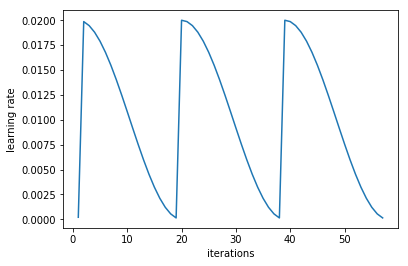

In [152]:
learn.sched.plot_lr()

## 5. Unfreeze

In [153]:
learn.unfreeze()

## 6. Train later layers at 3x - 10x lower

Use a 3x difference between layers

In [154]:
diff = 3

In [155]:
lr = np.array([learning_rate/diff/diff, learning_rate/diff, learning_rate])

In [156]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.580981   0.314586   0.90785   
    1      0.451943   0.285822   0.911263                  
    2      0.356944   0.254291   0.921502                  
    3      0.292763   0.248589   0.914676                  
    4      0.228462   0.252042   0.918089                  
    5      0.180032   0.228405   0.924915                  
    6      0.140691   0.230527   0.924915                  


[array([0.23053]), 0.9249146757679181]

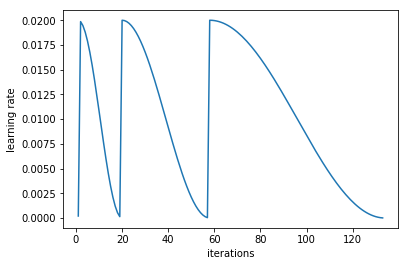

In [157]:
learn.sched.plot_lr()

## 7. Use lr_find again

In [158]:
learn.lr_find()

 79%|███████▉  | 15/19 [00:12<00:02,  1.66it/s, loss=0.128] 

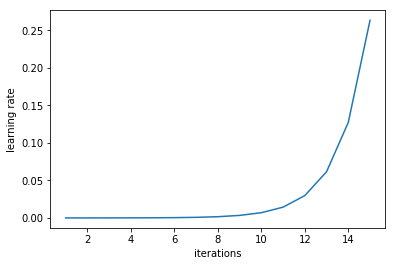

In [159]:
learn.sched.plot_lr()

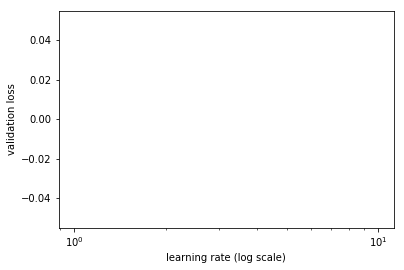

In [160]:
learn.sched.plot()

## 8. Train with cycle_mult=2 until overfitting

In [ ]:
learn.fit(learning_rate, 3, cycle_mult=2)

 79%|███████▉  | 15/19 [00:13<00:02,  1.44it/s, loss=0.248]